In [1]:
import time
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import bmi_cfe_perturb_ens

# 1. Run Normal CFE Simulations

In [2]:
cfe_instance = bmi_cfe_perturb_ens.BMI_CFE('./cat58_config_cfe_perturbs.json')

In [3]:
cfe_instance.initialize()


In [4]:
with open(cfe_instance.forcing_file, 'r') as f:
    df_forcing = pd.read_csv(f)
    
outputs = cfe_instance.get_output_var_names()
output_lists = {output:{ens:[] for ens in range(cfe_instance.n_cfe_ensembles)} for output in outputs}


for t, precip in enumerate(df_forcing['APCP_surface']):
    
    cfe_instance.set_value('atmosphere_water__time_integral_of_precipitation_mass_flux', precip)
    
    cfe_instance.update()
    
    for output in outputs:
    
        temp_output = cfe_instance.get_value(output)
        
        for ens in range(cfe_instance.n_cfe_ensembles):
            if output == 'atmosphere_water__time_integral_of_precipitation_mass_flux':
                output_lists[output][ens].append(temp_output)
            else:
                output_lists[output][ens].append(temp_output[ens])

In [5]:
cfe_instance.finalize()


GLOBAL MASS BALANCE
  initial volume:   0.7456
    volume input:   0.0000
   volume output:   0.2631
    final volume:   0.0000
        residual: 1.4674e-02


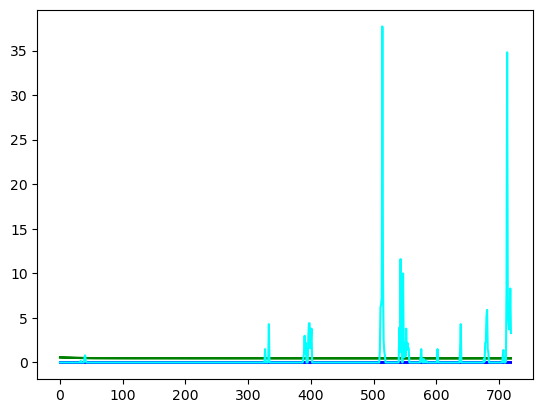

In [6]:
for ens in range(cfe_instance.n_cfe_ensembles):
    plt.plot(df_forcing.index.values, output_lists['land_surface_water__runoff_depth'][ens], c="b")
    plt.plot(df_forcing.index.values, output_lists['SOIL_CONCEPTUAL_STORAGE'][ens], c="g")
plt.plot(df_forcing.index.values, df_forcing['APCP_surface'], c="cyan")
plt.show()
plt.close()

In [7]:
output_lists.keys()

dict_keys(['land_surface_water__runoff_depth', 'land_surface_water__runoff_volume_flux', 'DIRECT_RUNOFF', 'GIUH_RUNOFF', 'NASH_LATERAL_RUNOFF', 'DEEP_GW_TO_CHANNEL_FLUX', 'SOIL_CONCEPTUAL_STORAGE', 'atmosphere_water__time_integral_of_precipitation_mass_flux'])